# Stock Market Sentiment Analysis

In [2]:
# load packages needed
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# read csv file
df = pd.read_csv('Combined_News_DJIA.csv')

# show head to see what the data looks like
print(df.head())

      Date         Open         High          Low        Close     Volume  \
0   8/8/08  11432.08984  11759.95996  11388.04004  11734.32031  212830000   
1  8/11/08  11729.66992  11867.11035  11675.53027  11782.34961  183190000   
2  8/12/08  11781.70020  11782.34961  11601.51953  11642.46973  173590000   
3  8/13/08  11632.80957  11633.78027  11453.33984  11532.95996  182550000   
4  8/14/08  11532.07031  11718.28027  11450.88965  11615.92969  159790000   

     Adj Close  Label                                               Top1  \
0  11734.32031      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  11782.34961      1  b'Why wont America and Nato help us? If they w...   
2  11642.46973      0  b'Remember that adorable 9-year-old who sang a...   
3  11532.95996      0  b' U.S. refuses Israel weapons to attack Iran:...   
4  11615.92969      1  b'All the experts admit that we should legalis...   

                                                Top2  ...  \
0            b'BREA

In [4]:
#display the dimensions of the dataframe
print(df.shape)

(1989, 33)


### Obervations:
- There are 1989 columns, or days worth of data.
- First column is the date of the price change, the next 6 are the price data for the day, the seventh is the price change boolean, and the last 25 columns are the headlines from the news on that day.

In [5]:
#look at the column data types
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
Label          int64
Top1          object
Top2          object
Top3          object
Top4          object
Top5          object
Top6          object
Top7          object
Top8          object
Top9          object
Top10         object
Top11         object
Top12         object
Top13         object
Top14         object
Top15         object
Top16         object
Top17         object
Top18         object
Top19         object
Top20         object
Top21         object
Top22         object
Top23         object
Top24         object
Top25         object
dtype: object

In [6]:
#get summary statistics of the numerical data
df.describe()

,Open,High,Low,Close,Volume,Adj Close,Label
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000,1989.000000
mean,13459.116049,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255,0.535445
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996,0.498867
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805,0.000000
25%,10907.339840,11000.980470,10824.759770,10913.379880,1.000000e+08,10913.379880,0.000000
50%,13022.049810,13088.110350,12953.129880,13025.580080,1.351700e+08,13025.580080,1.000000
75%,16477.699220,16550.070310,16392.769530,16478.410160,1.926000e+08,16478.410160,1.000000
max,18315.060550,18351.359380,18272.560550,18312.390630,6.749200e+08,18312.390630,1.000000


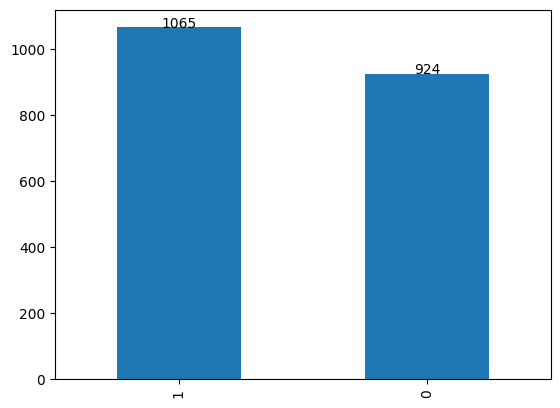

In [7]:
# show distribution of label
ax = df['Label'].value_counts().plot(kind='bar')

# add the actual numbers on top of the bars
for i, v in enumerate(df['Label'].value_counts()):
    ax.text(i, v, str(v), ha='center')

plt.show()


[12, 5, 13, 20, 22, 14, 13, 30, 14, 9, 18, 11, 30, 10, 6, 19, 4, 31, 20, 20, 16, 7, 16, 8, 6, 20, 7, 12, 17, 5, 12, 8, 17, 9, 8, 11, 11, 9, 19, 12, 8, 13, 15, 7, 5, 6, 14, 10, 7, 11, 14, 4, 11, 22, 7, 11, 10, 26, 33, 9, 19, 11, 32, 15, 8, 16, 7, 16, 7, 17, 6, 14, 22, 4, 10, 9, 24, 8, 21, 24, 10, 14, 6, 30, 10, 16, 11, 25, 9, 7, 4, 14, 6, 7, 8, 5, 11, 9, 15, 11, 10, 12, 12, 17, 13, 13, 10, 15, 10, 9, 8, 7, 11, 17, 12, 8, 15, 17, 6, 11, 8, 7, 8, 8, 14, 19, 8, 31, 20, 7, 15, 12, 14, 7, 10, 29, 31, 24, 6, 7, 16, 11, 14, 7, 12, 6, 12, 8, 7, 8, 19, 7, 7, 12, 10, 5, 8, 8, 32, 7, 9, 17, 11, 10, 13, 4, 9, 10, 6, 2, 9, 10, 13, 10, 8, 18, 14, 8, 8, 8, 4, 26, 10, 17, 4, 13, 13, 11, 12, 7, 12, 9, 7, 15, 21, 9, 8, 11, 7, 4, 27, 27, 22, 17, 6, 21, 7, 10, 11, 16, 6, 7, 10, 25, 17, 3, 14, 14, 8, 7, 9, 12, 9, 14, 7, 17, 10, 6, 5, 29, 7, 16, 11, 26, 25, 7, 22, 9, 7, 9, 5, 18, 12, 18, 6, 10, 14, 17, 7, 9, 30, 32, 26, 6, 8, 7, 14, 17, 21, 4, 13, 19, 9, 15, 11, 9, 7, 8, 9, 13, 9, 6, 7, 9, 8, 12, 6, 32, 16, 

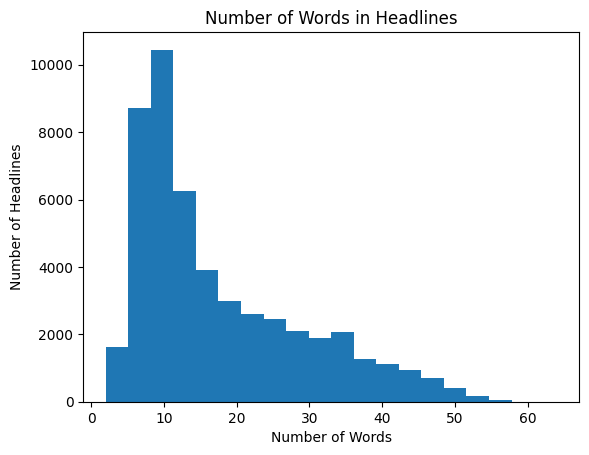

In [8]:
# chart the number of words used in the news headlines
# create a function get a count of words per top column dynamically
def word_count(sentence):
    return len(sentence.split())

word_counts = []

# loop through the columns and get the word count dynamically using "Top" and concatenating the number
for row in df.iterrows():
    for i in range(1, 26):
        # add count to list if the column is a string
        if isinstance(row[1]['Top'+str(i)], str):
            word_counts.append(word_count(row[1]['Top'+str(i)]))

print(word_counts)

# plot the word count
plt.hist(word_counts, bins=20)
plt.xlabel('Number of Words')
plt.ylabel('Number of Headlines')
plt.title('Number of Words in Headlines')
plt.show()


In [9]:
# clean up Top1-Top25 columns if column is not a string
for row in df.iterrows():
    for i in range(1, 26):
        # add count to list if the column is a string
        if isinstance(row[1]['Top'+str(i)], str):
            word_counts.append(word_count(row[1]['Top'+str(i)]))
        # if column is not a string, convert to string
        else:
            df['Top'+str(i)] = df['Top'+str(i)].astype(str)


In [10]:
'''# update Top1-Top25 columns to empty string if not a string
for row in df.iterrows():
    for i in range(1, 26):
        # set column to empty string if not a string
        if not isinstance(row[1]['Top'+str(i)], str):
            df['Top'+str(i)] = ''
'''

"# update Top1-Top25 columns to empty string if not a string\nfor row in df.iterrows():\n    for i in range(1, 26):\n        # set column to empty string if not a string\n        if not isinstance(row[1]['Top'+str(i)], str):\n            df['Top'+str(i)] = ''\n"

In [11]:
# replace any missing values with empty string for Top1-Top25 columns
for i in range(1, 26):
    df.loc[df['Top'+str(i)].isnull(), 'Top'+str(i)] = ''

print(df.head())

      Date         Open         High          Low        Close     Volume  \
0   8/8/08  11432.08984  11759.95996  11388.04004  11734.32031  212830000   
1  8/11/08  11729.66992  11867.11035  11675.53027  11782.34961  183190000   
2  8/12/08  11781.70020  11782.34961  11601.51953  11642.46973  173590000   
3  8/13/08  11632.80957  11633.78027  11453.33984  11532.95996  182550000   
4  8/14/08  11532.07031  11718.28027  11450.88965  11615.92969  159790000   

     Adj Close  Label                                               Top1  \
0  11734.32031      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  11782.34961      1  b'Why wont America and Nato help us? If they w...   
2  11642.46973      0  b'Remember that adorable 9-year-old who sang a...   
3  11532.95996      0  b' U.S. refuses Israel weapons to attack Iran:...   
4  11615.92969      1  b'All the experts admit that we should legalis...   

                                                Top2  ...  \
0            b'BREA

In [12]:
# loop through the top columns to convert all text to lowercase letters
# and remove special characters from the text.
import re
for row in df.iterrows():
    for i in range(1, 26):
        # convert words to lower case and remove special characters
        if isinstance(row[1]['Top'+str(i)], str):
            df['Top'+str(i)] = df['Top'+str(i)].apply(lambda x: x.lower())
            df['Top'+str(i)] = df['Top'+str(i)].apply(lambda x: re.sub(r'\W+', ' ', x))

In [13]:
# Remove stop words.
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# get list of stop words
stop_words = set(stopwords.words('english'))

# Tokenize the words in the headline text
def tokenize_text(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# loop through the top columns to tokenize the text
for i in range(1, 26):
    df['Top'+str(i)] = df['Top'+str(i)].apply(tokenize_text)

print(df.head())

      Date         Open         High          Low        Close     Volume  \
0   8/8/08  11432.08984  11759.95996  11388.04004  11734.32031  212830000   
1  8/11/08  11729.66992  11867.11035  11675.53027  11782.34961  183190000   
2  8/12/08  11781.70020  11782.34961  11601.51953  11642.46973  173590000   
3  8/13/08  11632.80957  11633.78027  11453.33984  11532.95996  182550000   
4  8/14/08  11532.07031  11718.28027  11450.88965  11615.92969  159790000   

     Adj Close  Label                                               Top1  \
0  11734.32031      0  b georgia downs two russian warplanes countrie...   
1  11782.34961      1  b wont america nato help us wont help us help ...   
2  11642.46973      0  b remember adorable 9 year old sang opening ce...   
3  11532.95996      0      b u refuses israel weapons attack iran report   
4  11615.92969      1                     b experts admit legalise drugs   

                                                Top2  ...  \
0                  

In [14]:
# Apply NLTK’s PorterStemmer.
from nltk.stem import PorterStemmer 

ps = PorterStemmer()

def stem_text(text):
    words = word_tokenize(text)

    # get the stem of each word
    stemmed_words = [ps.stem(word) for word in words]
    return ' '.join(stemmed_words)

# replace the Top# with the stemmed words
for i in range(1, 26):
    df['Top'+str(i)] = df['Top'+str(i)].apply(stem_text)

print(df.head())

      Date         Open         High          Low        Close     Volume  \
0   8/8/08  11432.08984  11759.95996  11388.04004  11734.32031  212830000   
1  8/11/08  11729.66992  11867.11035  11675.53027  11782.34961  183190000   
2  8/12/08  11781.70020  11782.34961  11601.51953  11642.46973  173590000   
3  8/13/08  11632.80957  11633.78027  11453.33984  11532.95996  182550000   
4  8/14/08  11532.07031  11718.28027  11450.88965  11615.92969  159790000   

     Adj Close  Label                                               Top1  \
0  11734.32031      0  b georgia down two russian warplan countri mov...   
1  11782.34961      1  b wont america nato help us wont help us help ...   
2  11642.46973      0   b rememb ador 9 year old sang open ceremoni fake   
3  11532.95996      0         b u refus israel weapon attack iran report   
4  11615.92969      1                        b expert admit legalis drug   

                                                Top2  ...  \
0                  

In [15]:
# get the subjectivity of the text
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# get the polarity of the text
def get_polarity(text):
    result = TextBlob(text).sentiment.polarity
    if result >= 0:
        return 1
    else:
        return 0

# create two new columns for subjectivity and polarity
for i in range(1, 26):
    df['Subjectivity'+str(i)] = df['Top'+str(i)].apply(get_subjectivity)
    df['Polarity'+str(i)] = df['Top'+str(i)].apply(get_polarity)

# get the sentiment of the text
def get_sentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# create a new column for sentiment
for i in range(1, 26):
    df['Sentiment'+str(i)] = df['Polarity'+str(i)].apply(get_sentiment)

print(df.head())


      Date         Open         High          Low        Close     Volume  \
0   8/8/08  11432.08984  11759.95996  11388.04004  11734.32031  212830000   
1  8/11/08  11729.66992  11867.11035  11675.53027  11782.34961  183190000   
2  8/12/08  11781.70020  11782.34961  11601.51953  11642.46973  173590000   
3  8/13/08  11632.80957  11633.78027  11453.33984  11532.95996  182550000   
4  8/14/08  11532.07031  11718.28027  11450.88965  11615.92969  159790000   

     Adj Close  Label                                               Top1  \
0  11734.32031      0  b georgia down two russian warplan countri mov...   
1  11782.34961      1  b wont america nato help us wont help us help ...   
2  11642.46973      0   b rememb ador 9 year old sang open ceremoni fake   
3  11532.95996      0         b u refus israel weapon attack iran report   
4  11615.92969      1                        b expert admit legalis drug   

                                                Top2  ... Sentiment16  \
0      

/var/folders/5d/hk6_hwm107g31m70fx6f2k5r0000gn/T/ipykernel_97779/509798007.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Sentiment'+str(i)] = df['Polarity'+str(i)].apply(get_sentiment)
/var/folders/5d/hk6_hwm107g31m70fx6f2k5r0000gn/T/ipykernel_97779/509798007.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Sentiment'+str(i)] = df['Polarity'+str(i)].apply(get_sentiment)
/var/folders/5d/hk6_hwm107g31m70fx6f2k5r0000gn/T/ipykernel_97779/509798007.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is

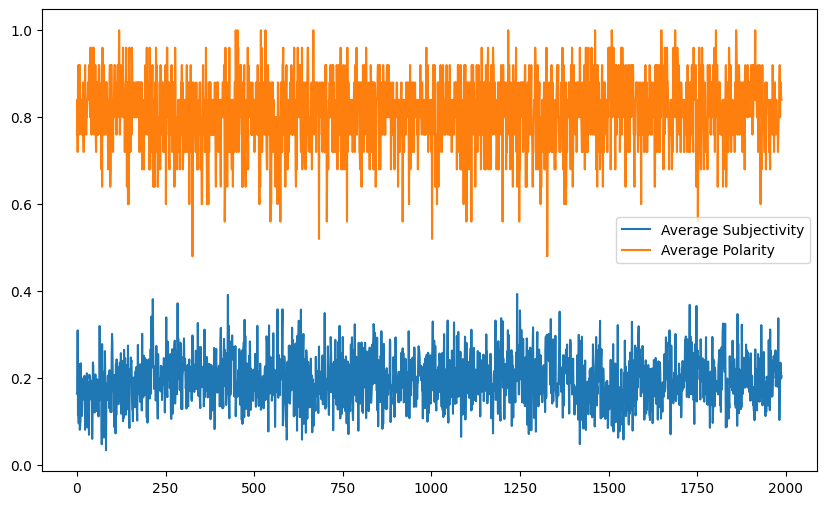

In [16]:
# get the average subjectivity and polarity for each day
df['Average Subjectivity'] = df[[col for col in df.columns if 'Subjectivity' in col]].mean(axis=1)
df['Average Polarity'] = df[[col for col in df.columns if 'Polarity' in col]].mean(axis=1)

# plot the average subjectivity and polarity
plt.figure(figsize=(10,6))
df['Average Subjectivity'].plot()
df['Average Polarity'].plot()
plt.legend()
plt.show()


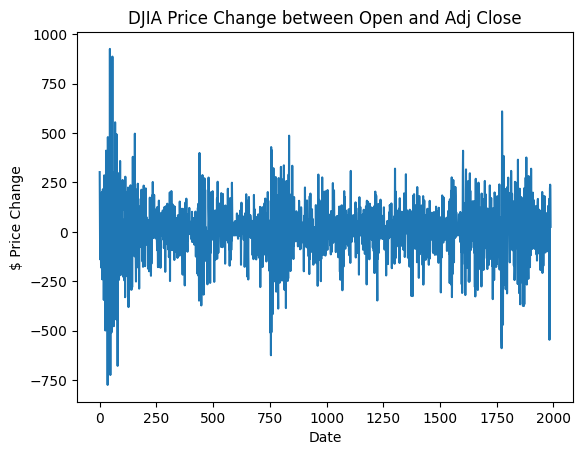

In [17]:
# calculate and plot price change between open and adj close
df['Price Change'] = df['Adj Close'] - df['Open']
plt.plot(df['Price Change'])
plt.xlabel('Date')
plt.ylabel('$ Price Change')
plt.title('DJIA Price Change between Open and Adj Close')
plt.show()

Without building a model to look deeper it's hard to tell what is going on with this analysis. By looking at the data and charts so far there is a fairly even outcome of positive and negative days in the market. However we have yet to determine if the news sentiment has any influence on the price of the DJIA. 

## Milestone 2

In [18]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,...,Sentiment19,Sentiment20,Sentiment21,Sentiment22,Sentiment23,Sentiment24,Sentiment25,Average Subjectivity,Average Polarity,Price Change
0,8/8/08,11432.08984,11759.95996,11388.04004,11734.32031,212830000,11734.32031,0,b georgia down two russian warplan countri mov...,b break musharraf impeach,...,Positive,Positive,Neutral,Positive,Positive,Neutral,Positive,0.164234,0.76,302.23047
1,8/11/08,11729.66992,11867.11035,11675.53027,11782.34961,183190000,11782.34961,1,b wont america nato help us wont help us help ...,b bush put foot georgian conflict,...,Positive,Positive,Positive,Positive,Positive,Positive,Positive,0.169630,0.84,52.67969
2,8/12/08,11781.70020,11782.34961,11601.51953,11642.46973,173590000,11642.46973,0,b rememb ador 9 year old sang open ceremoni fake,b russia end georgia oper,...,Neutral,Neutral,Positive,Positive,Neutral,Positive,Neutral,0.309610,0.72,-139.23047
3,8/13/08,11632.80957,11633.78027,11453.33984,11532.95996,182550000,11532.95996,0,b u refus israel weapon attack iran report,b presid order attack tskhinvali capit south o...,...,Positive,Positive,Positive,Positive,Positive,Positive,Positive,0.115206,0.88,-99.84961
4,8/14/08,11532.07031,11718.28027,11450.88965,11615.92969,159790000,11615.92969,1,b expert admit legalis drug,b war south osetia 89 pictur made russian soldier,...,Positive,Positive,Positive,Positive,Positive,Positive,Positive,0.146143,0.92,83.85938


In [19]:
# print the columns
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'Label',
       'Top1', 'Top2',
       ...
       'Sentiment19', 'Sentiment20', 'Sentiment21', 'Sentiment22',
       'Sentiment23', 'Sentiment24', 'Sentiment25', 'Average Subjectivity',
       'Average Polarity', 'Price Change'],
      dtype='object', length=111)


In [20]:
# create new dataframe with the most applicable columns for the model after cleaning,
# and creating new features for sentiment analysis
clean_df = df[['Label', 'Average Subjectivity', 'Average Polarity']]

In [38]:
linear_df = df[['Label', 'Average Subjectivity', 'Average Polarity', 'Price Change']]

In [21]:
clean_df.head()

,Label,Average Subjectivity,Average Polarity
0,0,0.164234,0.76
1,1,0.169630,0.84
2,0,0.309610,0.72
3,0,0.115206,0.88
4,1,0.146143,0.92


## Milestone 3

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_

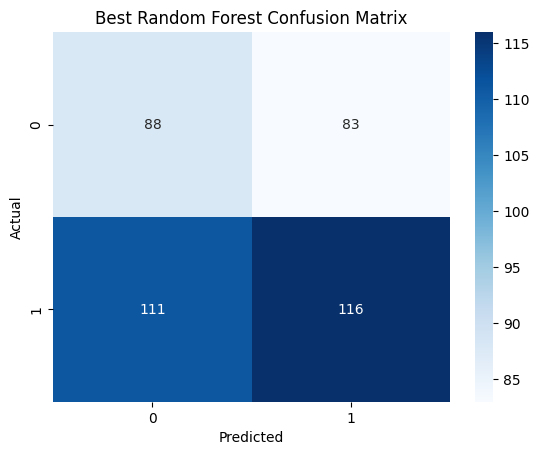

In [59]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initializing GridSearchCV with n_jobs=1 to avoid parallel processing issues
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=1, verbose=2)
grid_search.fit(X_resampled_scaled, y_resampled_scaled)

# Making predictions with the best estimator
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Evaluating the model
accuracy_best_rf = accuracy_score(y_test_scaled, y_pred_best_rf)
conf_matrix_best_rf = confusion_matrix(y_test_scaled, y_pred_best_rf)
class_report_best_rf = classification_report(y_test_scaled, y_pred_best_rf)

print(f'Best Random Forest Accuracy: {accuracy_best_rf}')
print('Best Random Forest Confusion Matrix:')
print(conf_matrix_best_rf)
print('Best Random Forest Classification Report:')
print(class_report_best_rf)

# Visualizing the confusion matrix
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Best Random Forest Confusion Matrix')
plt.show()


Gradient Boosting Accuracy: 0.5
Gradient Boosting Confusion Matrix:
[[ 84  87]
 [112 115]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.49      0.46       171
           1       0.57      0.51      0.54       227

    accuracy                           0.50       398
   macro avg       0.50      0.50      0.50       398
weighted avg       0.51      0.50      0.50       398



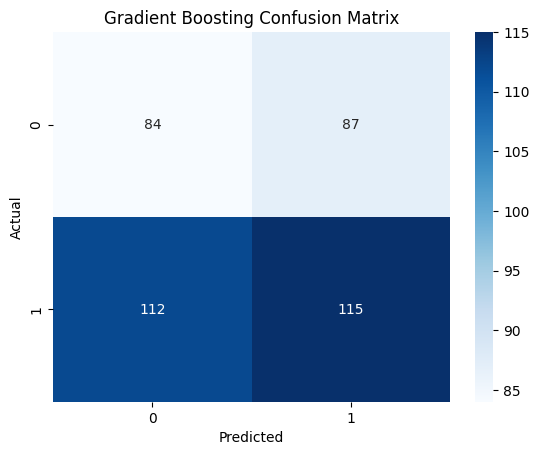

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

# Initializing and fitting the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_resampled_scaled, y_resampled_scaled)

# Making predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluating the model
accuracy_gb = accuracy_score(y_test_scaled, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test_scaled, y_pred_gb)
class_report_gb = classification_report(y_test_scaled, y_pred_gb)

print(f'Gradient Boosting Accuracy: {accuracy_gb}')
print('Gradient Boosting Confusion Matrix:')
print(conf_matrix_gb)
print('Gradient Boosting Classification Report:')
print(class_report_gb)

# Visualizing the confusion matrix
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()


                Feature     Score
0  Average Subjectivity  1.333296
1      Average Polarity  0.030578
Random Forest with Best Features Accuracy: 0.5100502512562815
Random Forest with Best Features Confusion Matrix:
[[ 90  81]
 [114 113]]
Random Forest with Best Features Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.53      0.48       171
           1       0.58      0.50      0.54       227

    accuracy                           0.51       398
   macro avg       0.51      0.51      0.51       398
weighted avg       0.52      0.51      0.51       398



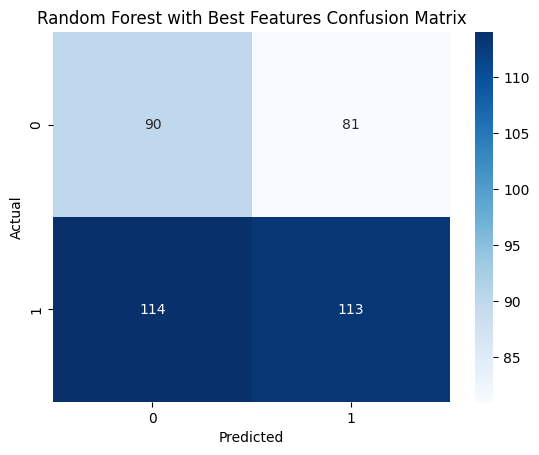

In [62]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Applying SelectKBest to extract the best features 
best_features = SelectKBest(score_func=f_classif, k=2)
fit = best_features.fit(X_resampled_scaled, y_resampled_scaled)

# Get the scores for each feature
feature_scores = pd.DataFrame({'Feature': clean_df.drop(columns=['Label']).columns, 'Score': fit.scores_})
print(feature_scores.nlargest(2, 'Score'))

# Transform the dataset to select the top 2 features
X_best = fit.transform(X_resampled_scaled)
X_test_best = fit.transform(X_test_scaled)

# Initializing and fitting the Random Forest classifier with top features
rf_best_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_best_model.fit(X_best, y_resampled_scaled)

# Making predictions
y_pred_rf_best = rf_best_model.predict(X_test_best)

# Evaluating the model
accuracy_rf_best = accuracy_score(y_test_scaled, y_pred_rf_best)
conf_matrix_rf_best = confusion_matrix(y_test_scaled, y_pred_rf_best)
class_report_rf_best = classification_report(y_test_scaled, y_pred_rf_best)

print(f'Random Forest with Best Features Accuracy: {accuracy_rf_best}')
print('Random Forest with Best Features Confusion Matrix:')
print(conf_matrix_rf_best)
print('Random Forest with Best Features Classification Report:')
print(class_report_rf_best)

# Visualizing the confusion matrix
sns.heatmap(conf_matrix_rf_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest with Best Features Confusion Matrix')
plt.show()


I tried a handful of models and I am not seeing great model performance. It is possible that the sentiment and DJIA price changes aren't related, or at least not related with an immediate affect on the price. 